## 1. Project Introduction

### The basic principle of thermal power generation is that when the fuel burns, it heats water to produce steam, the steam pressure drives the turbine to rotate, and then the turbine drives the generator to rotate to generate electricity.

### There are many factors that affect the combustion efficiency of the boiler, such as fuel feed, induced draft, return air, feed water volume, as well as the boiler bed temperature, bed pressure and furnace temperature.

<div style="text-align: center;">
    <img src="./pic/Steam_Power_Generation.jpg" alt="My Photo" />
</div>

### We need to use the data collected by the desensitized boiler sensor to predict the amount of steam generated based on the boiler's operating conditions.

## 2. Import the Data Exploration Toolkit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## 3. Load Data

In [2]:
train_data_file = './zhengqi_train.txt'
test_data_file = './zhengqi_test.txt'

train_data = pd.read_csv(train_data_file, sep = '\t')
test_data = pd.read_csv(test_data_file, sep = '\t')

## 4. View Data and Feature Variable Information

In [3]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

### We can see that the training set data has 2888 samples and the test set data has 1925 samples. There are 38 feature variables in the data from $V0 $ to $V37$, and all variable types are numeric types.

### Secondly, all data features have no missing values, and the data fields are desensitized to delete the specific meaning of the feature data.

## 5. Check Data Statistics

In [4]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [5]:
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


### The above content shows the statistical information of the data, such as the number of samples, mean, standard deviation, maximum and minimum values, etc.

## 6. Box Plot Data Exploration

<Axes: ylabel='V0'>

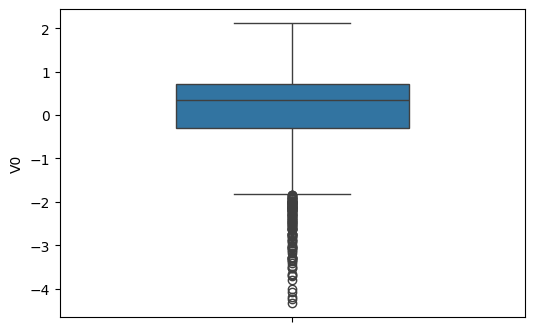

In [6]:
fig = plt.figure(figsize = (6,4))  # Specify the width and height of the drawing object
sns.boxplot(train_data['V0'], orient = 'v', width = 0.5)

### Check box plots of all feature variables

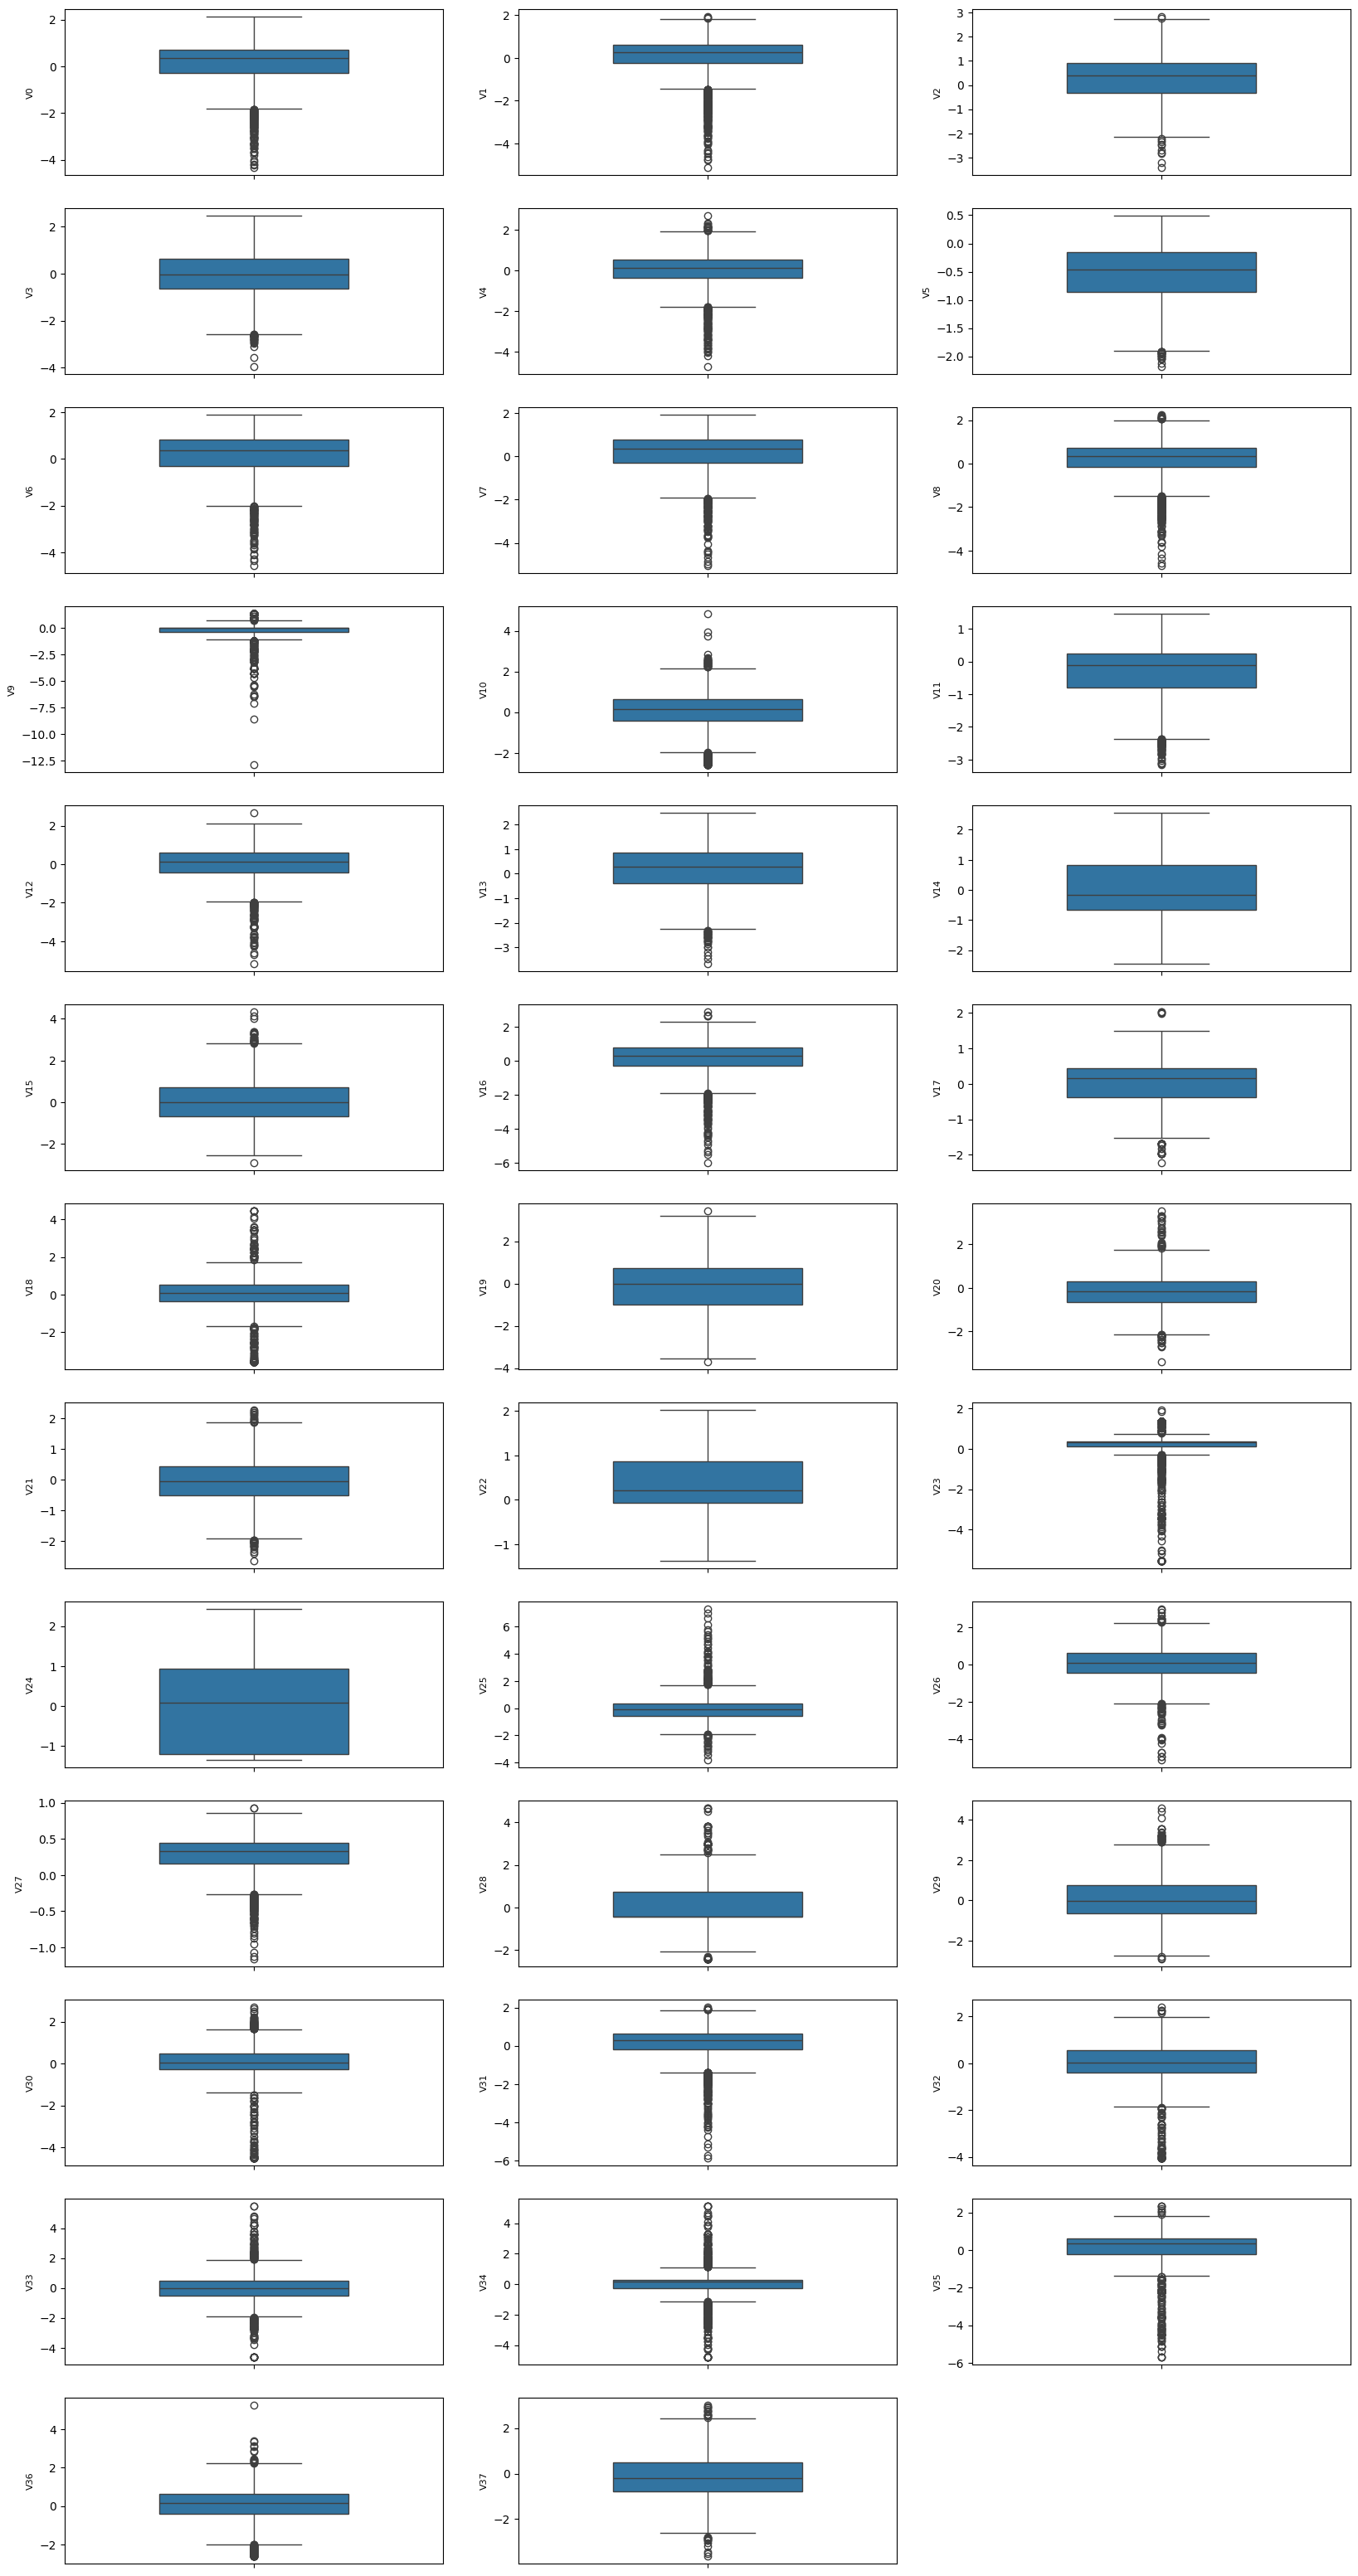

In [7]:
column = train_data.columns.tolist()[:39]  # List header
fig = plt.figure(figsize = (20,40))  # Specify the height and width of the drawing object
for i in range(38):
    plt.subplot(13,3, i+1)   # 13 rows and 3 columns subplot
    sns.boxplot(train_data[column[i]], orient = 'v', width = 0.5)
    plt.ylabel(column[i], fontsize = 8)
plt.show()

## 7. View the data distribution of the training set and test set

### Compare the distribution of training set data and test set data under the same feature variable $V0$ to see whether the data distribution is consistent

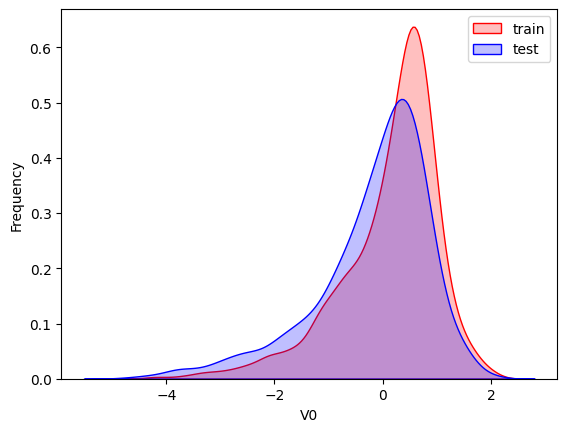

In [8]:
ax = sns.kdeplot(train_data['V0'], color = 'Red', shade = True)
ax = sns.kdeplot(test_data['V0'], color = 'Blue', shade = True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(["train", "test"])

### We can see that for the feature variable $V0$, the distribution of the training set and the test set is relatively consistent, which means that the model can achieve better prediction results in the test set.

### Next, we check the distribution of training set data and feature set data under all feature variables, analyze and find out the feature variables with inconsistent distribution

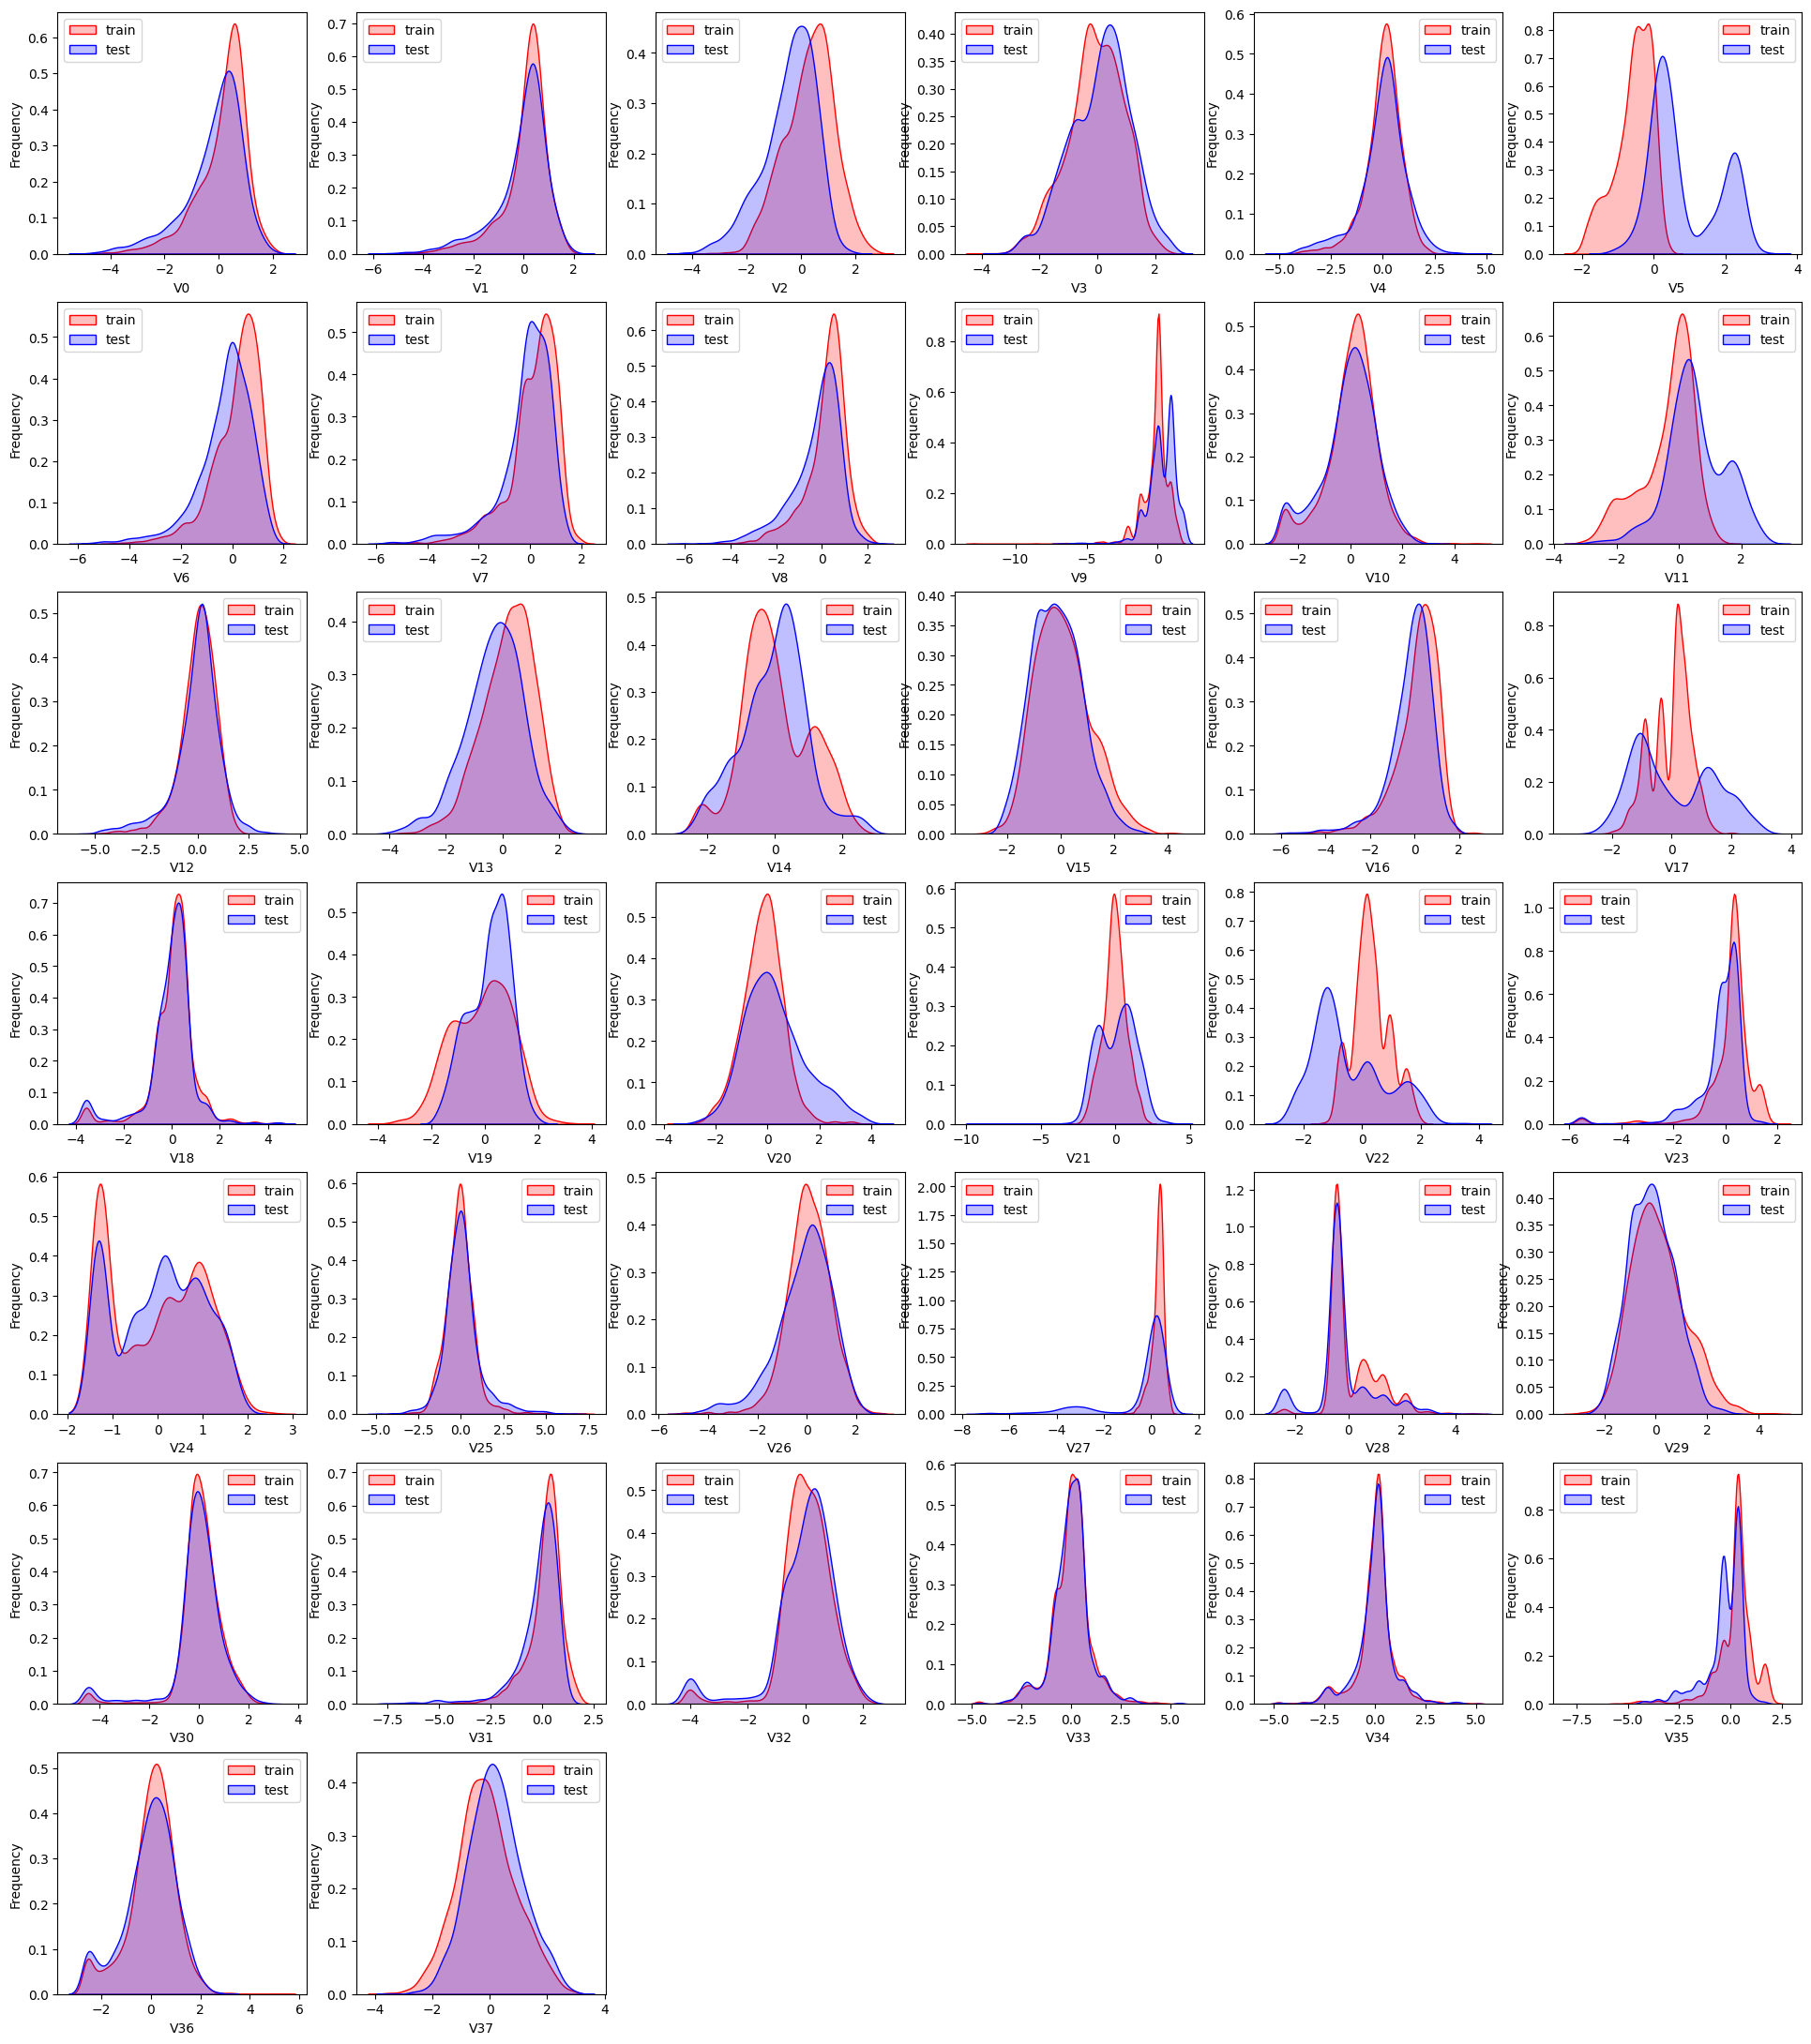

In [9]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize = (4 * dist_cols, 4 * dist_rows))

i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color = 'Red', shade = True)
    ax = sns.kdeplot(test_data[col], color = 'Blue', shade = True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])

    i += 1

plt.show()

### We found that the data distribution of features $V5$, $V9$, $V11$, $V17$, and $V22$ in the training set and test set is inconsistent

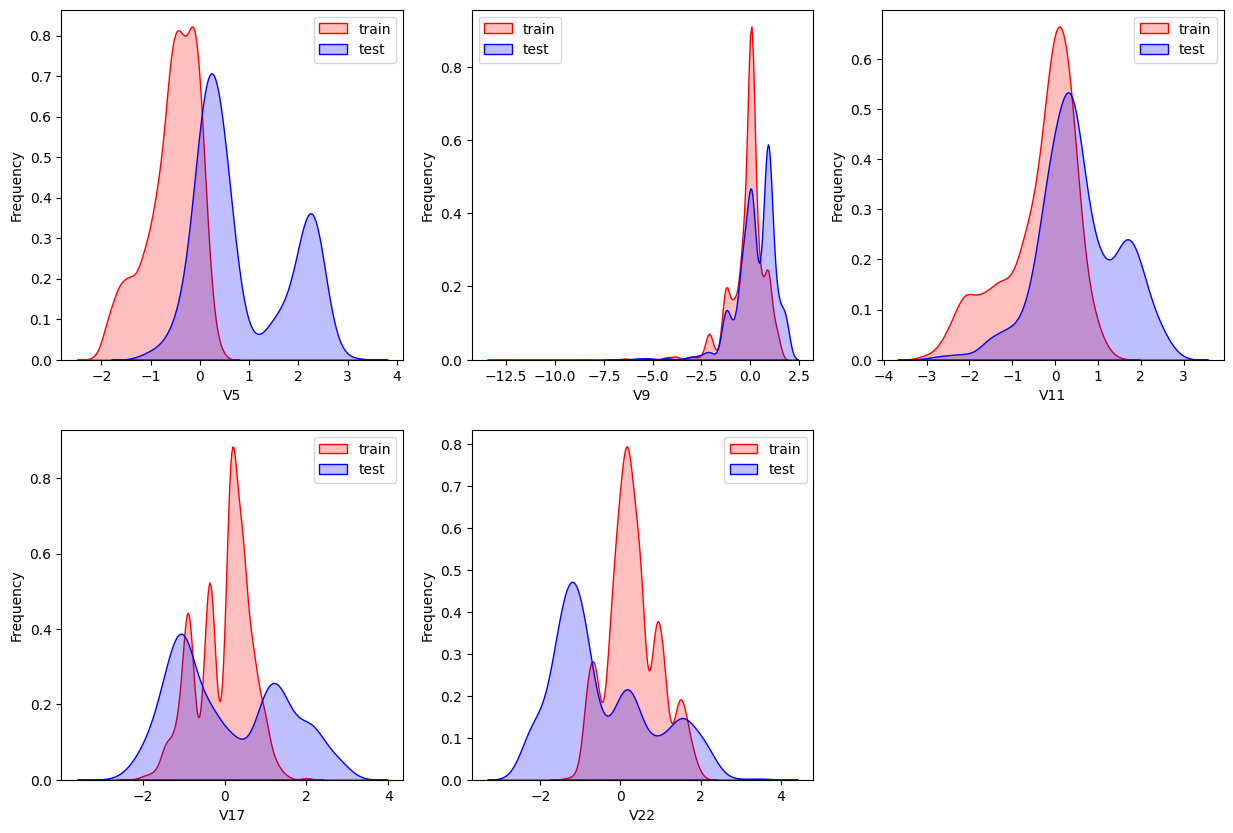

In [10]:
col = 3 
row = 2
plt.figure(figsize = (5*col, 5* row))
i = 1
for c in ["V5", "V9", "V11", "V17", "V22"]:
    ax = plt.subplot(row, col, i)
    ax = sns.kdeplot(train_data[c], color = 'Red', shade = True)
    ax = sns.kdeplot(test_data[c], color = 'Blue', shade = True)
    ax.set_xlabel(c)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])

    i += 1

plt.show()

### Since the data distribution of the training set and the test set is inconsistent, the model generalization ability will be poor, so such features are deleted.

In [11]:
drop_col_kde = ['V5', 'V9', 'V11', 'V17', 'V22']
train_data_drop = train_data.drop(drop_col_kde, axis=1)

## 8. Feature Correlation

### Plotting a semi-heatmap of correlations

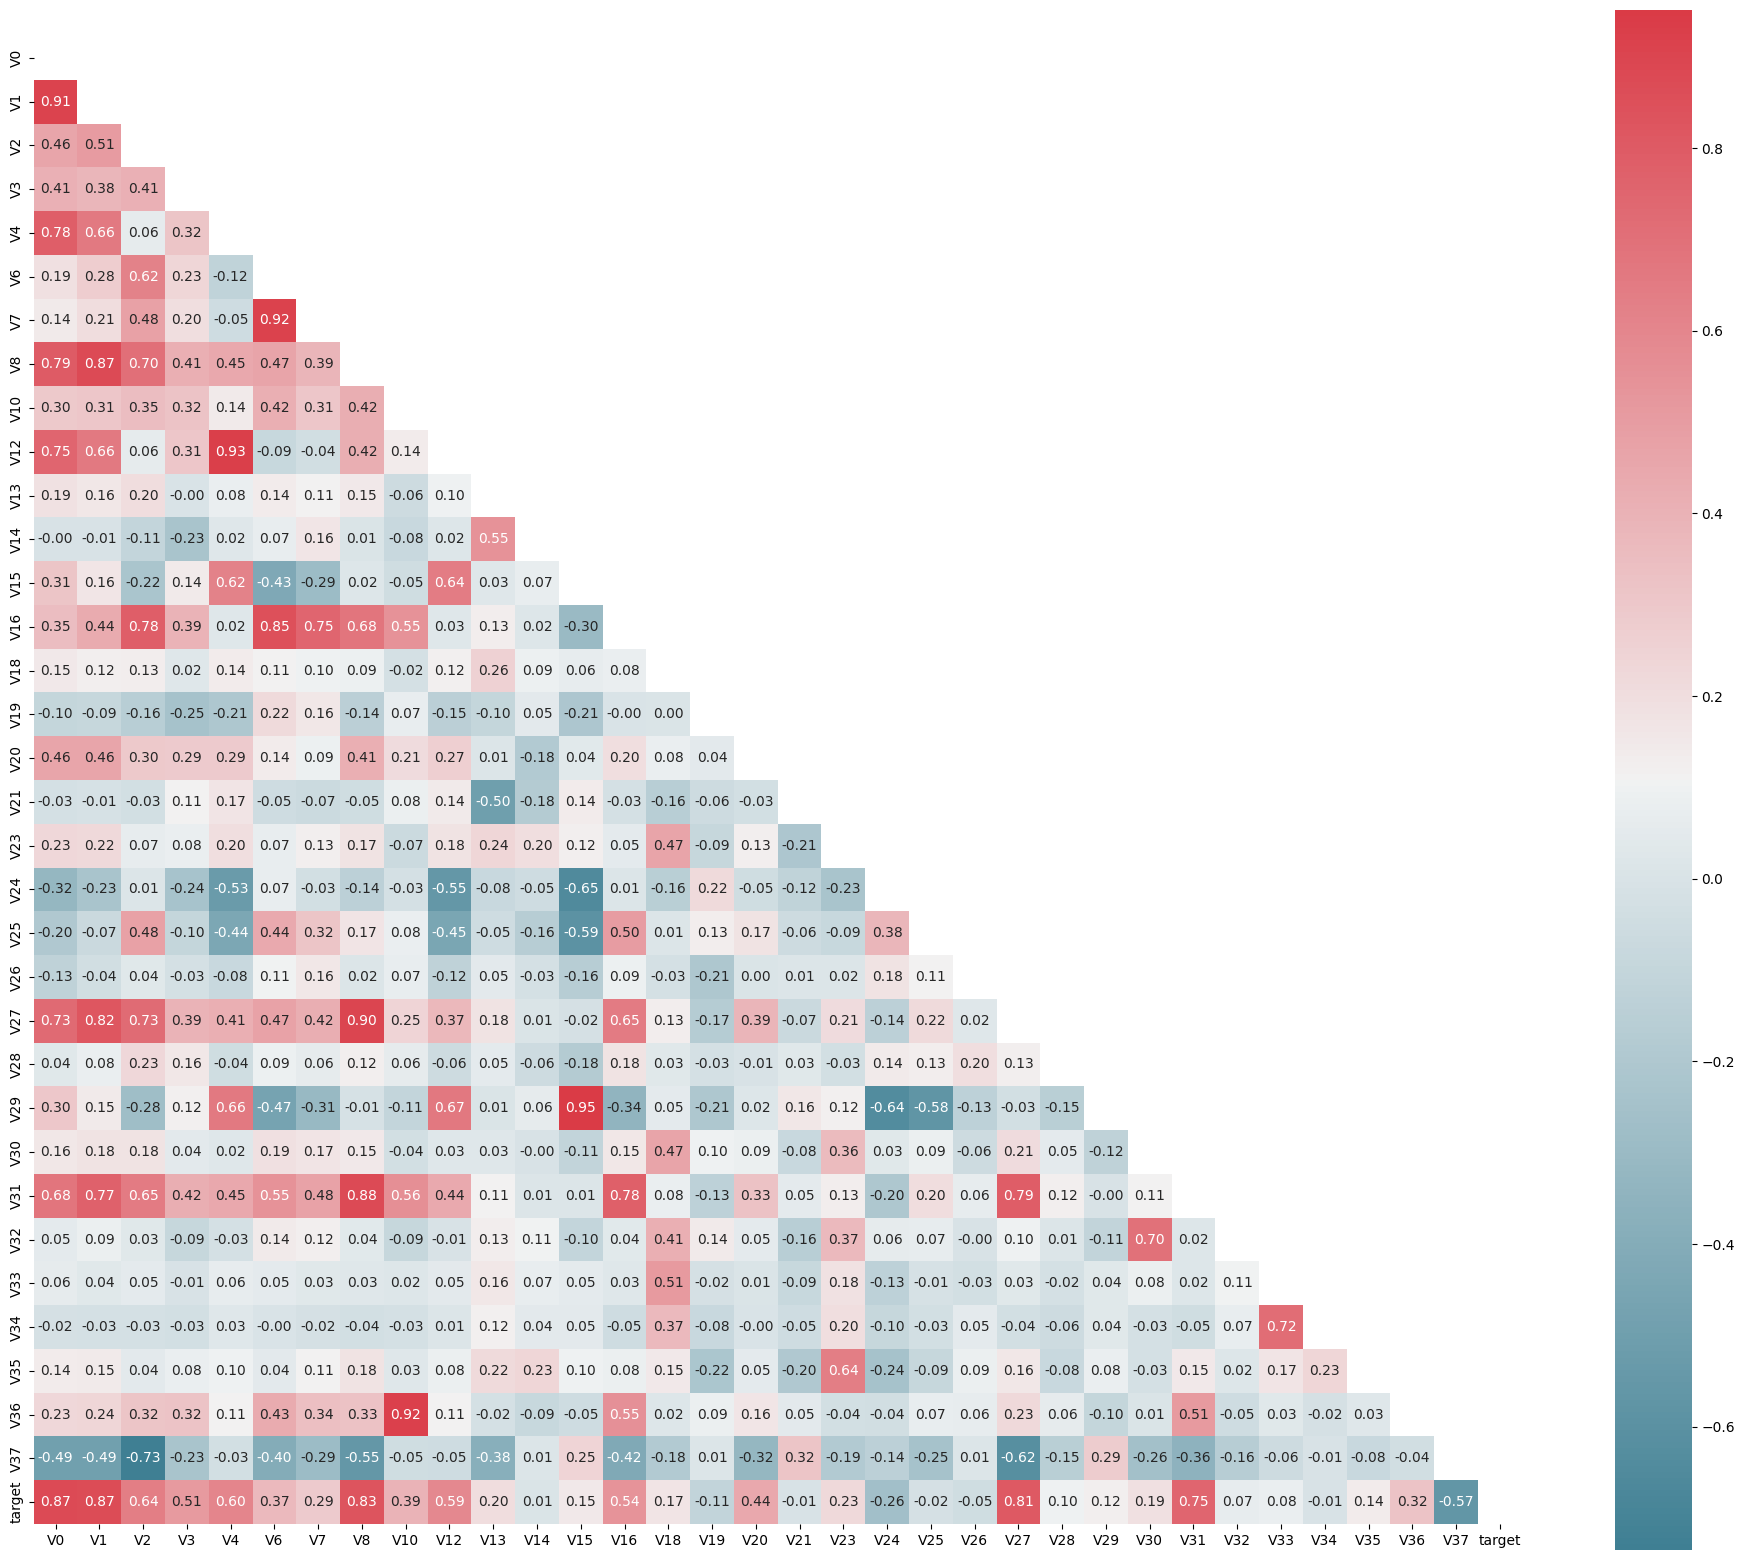

In [12]:
plt.figure(figsize = (24,20))
column = train_data_drop.columns.tolist()  # List header
# The correlation coefficient matrix gives the correlation coefficient between any two variables
mcorr = train_data_drop.corr()
# Constructs a matrix of the same dimension as mcorr, of type bool
mask = np.zeros_like(mcorr, dtype = bool)
# True on the right side of the angle dividing line
mask[np.triu_indices_from(mask)] = True
# Set the colormap object to represent the color
cmap = sns.diverging_palette(220, 10, as_cmap = True)
# Draw heatmap
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')


### The above figure shows the correlation coefficients between all feature variables and between feature variables and target.

## 9. Feature Screening

### Remove feature variables that are inconsistently distributed between the training set and the test set

In [13]:
train_data.drop(drop_col_kde, axis=1, inplace=True)
test_data.drop(drop_col_kde, axis=1, inplace=True)
train_data.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


### Correlation coefficient (absolute value):

### 0.8-1.0: extremely strong correlation
### 0.6-0.8: strong correlation
### 0.4-0.6: moderate correlation
### 0.2-0.4: weak correlation
### 0.0-0.2: extremely weak correlation or no correlation
### We filter out feature variables with correlation less than 0.1

In [14]:
cond = mcorr['target'].abs() < 0.1
drop_col_corr = mcorr.index[cond]
display(drop_col_corr)
train_data.drop(drop_col_corr, axis=1, inplace=True)
test_data.drop(drop_col_corr, axis=1, inplace=True)

Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')

In [15]:
display(train_data.head())

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V24,V27,V28,V29,V30,V31,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.800,0.168,-0.450,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.801,0.338,0.671,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.961,0.326,1.287,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,1.435,0.277,1.298,0.015,0.417,0.279,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.881,0.332,1.289,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384


In [16]:
display(test_data.head())

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V23,V24,V27,V28,V29,V30,V31,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.550,0.551,0.244,-0.419,0.346,...,0.098,-1.314,0.208,-0.449,0.047,0.057,-0.042,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,0.487,0.493,-0.127,-0.403,0.465,...,0.090,-1.310,0.226,-0.443,0.047,0.560,0.176,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.485,0.493,-0.227,0.330,0.173,...,0.091,-1.310,0.084,-0.458,-0.398,0.101,0.199,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.474,0.504,0.010,-0.431,-0.038,...,0.086,0.234,0.203,-0.456,-0.398,1.007,0.137,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.408,0.497,0.155,-0.162,-0.063,...,0.089,0.237,0.227,-0.458,-0.776,0.291,0.370,0.008,-0.140,-0.497


## 10. Data merging and saving

In [18]:
train_data['label'] = 'train'
test_data['label'] = 'test'
all_data = pd.concat([train_data, test_data])
all_data.to_csv('./processed_zhengqi_data.csv', index=False)
all_data.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V27,V28,V29,V30,V31,V35,V36,V37,target,label
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.168,-0.450,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.338,0.671,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.326,1.287,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.277,1.298,0.015,0.417,0.279,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.332,1.289,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384,train
